In [ ]:
!pip install frontend
!pip install tools
!pip install --upgrade PyMuPDF
!pip install -U sentence_transformers
!pip install faiss-gpu
!pip install transformers datasets accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tools: filename=tools-0.1.9-py3-none-any.whl size=46729 sha256=82b614bb94e92ee863340ff965ac9ba46e725c4ed621a3368b863e19006b334b
  Stored in directory: /root/.cache/pip/wheels/c0/d0/70/a33bd4bed2af4f7038b038c16faab552cd0e9d9f4125223a71
  Created wheel for pytils: filename=pytils-0.4.1-py3-none-any.whl size=32875 sha256=bf80a1f9bf961f45ed32ff9ba218bdf4ef42c381e8ad04620c7783aabbf34efa
  Stored in directory: /root/.cache/pip/wheels/5a/eb/7c/3b6f0c25815749883152b2caca34c35dbaab13ec2864270cbd
Successfully built tools pytils
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import fitz  # PyMuPDF

def extract_text_from_pdf(file_path, start, end):
    text = ""
    with fitz.open(file_path) as pdf:
        # Ensure the page range is within bounds
        start_index = max(start - 1, 0)  # Convert to zero-based index
        end_index = min(end, len(pdf))  # Ensure end is within bounds

        for page_num in range(start_index, end_index):
            try:
                text += pdf[page_num].get_text()
            except Exception as e:
                print(f"Error reading page {page_num+1} in {file_path}: {e}")
    return text

# Paths to documents and page ranges
document_paths = ["doc1.pdf", "doc2.pdf", "doc3.pdf", "doc4.pdf", "doc5.pdf", "doc6.pdf", "doc7.pdf"]
page_range = [[6, 87],
              [4, 116],
              [1, 15],
              [1, 38],
              [4, 78],
              [8, 51],
              [3, 82]]

# Extract text from the specified ranges
text_data = []
for i, doc in enumerate(document_paths):
    print(f"Extracting text from {doc} (pages {page_range[i][0]} to {page_range[i][1]})")
    text = extract_text_from_pdf(doc, page_range[i][0], page_range[i][1])
    text_data.append(text)

print(f"Extraction completed for {len(document_paths)} documents.")


Extracting text from doc1.pdf (pages 6 to 87)
Extracting text from doc2.pdf (pages 4 to 116)
Extracting text from doc3.pdf (pages 1 to 15)
Extracting text from doc4.pdf (pages 1 to 38)
Extracting text from doc5.pdf (pages 4 to 78)
Extracting text from doc6.pdf (pages 8 to 51)
Extracting text from doc7.pdf (pages 3 to 82)
Extraction completed for 7 documents.


In [ ]:
def segment_text(text, chunk_size=200):
    sentences = text.split(". ")
    chunks = []
    current_chunk = []
    for sentence in sentences:
        current_chunk.append(sentence)
        if len(" ".join(current_chunk)) > chunk_size:
            chunks.append(" ".join(current_chunk))
            current_chunk = []
    if current_chunk:  # Add the last chunk
        chunks.append(" ".join(current_chunk))
    return chunks

# Segment all documents into chunks
all_chunks = []
for doc in text_data:
    doc = doc.replace("\n", " ")
    doc = doc.replace("\t", " ")
    doc = doc.replace("\r", " ")
    all_chunks.extend(segment_text(doc))
print(f"Number of chunks: {len(all_chunks)}")

Number of chunks: 4267


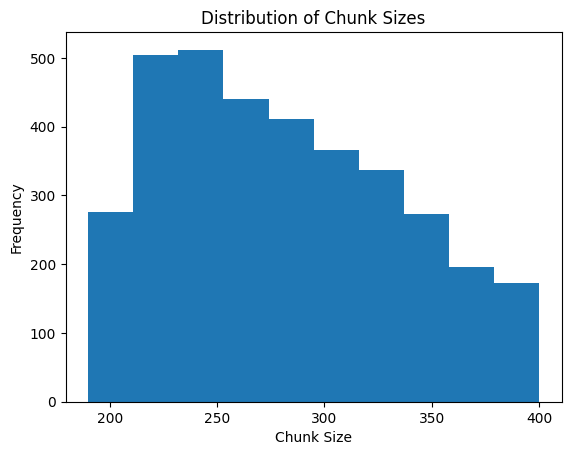

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
chunks_sizes = np.array([len(all_chunks[i]) for i in range(len(all_chunks))])
plt.hist(chunks_sizes, bins=10, range=[190,400])
plt.xlabel('Chunk Size')
plt.ylabel('Frequency')
plt.title('Distribution of Chunk Sizes')
plt.show()

In [ ]:
np.max(chunks_sizes), np.min(chunks_sizes), np.mean(chunks_sizes), np.median(chunks_sizes)

(23402, 21, 346.53011483477854, 293.0)

In [ ]:
from sentence_transformers import SentenceTransformer

# Load a Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Embed all text chunks
chunk_embeddings = model.encode(all_chunks, show_progress_bar=True)
print(f"Chunk Embedding shape: {chunk_embeddings.shape}")

# Embed predefined section titles
sections = [
    "Adaptation finance",
    "Flooding risks",
    "Extreme heatwave and drought preparations",
    "Tropical cyclone preparedness guidelines",
    "Developing countries and small island states"
]
section_embeddings = model.encode(sections)
print(f"Section Embedding shape: {section_embeddings.shape}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/134 [00:00<?, ?it/s]

Chunk Embedding shape: (4267, 384)
Section Embedding shape: (5, 384)


In [ ]:
import faiss
import numpy as np

# Concatenate chunk and section embeddings
all_embeddings = np.vstack([chunk_embeddings, section_embeddings])

# Create a combined FAISS index
combined_index = faiss.IndexFlatL2(all_embeddings.shape[1])
combined_index.add(all_embeddings)

# Save the combined FAISS index
faiss.write_index(combined_index, "combined_vector.index")
print("Combined FAISS index saved to 'combined_vector.index'.")

# Metadata to distinguish between sections and chunks
metadata = {
    "chunks": list(range(len(chunk_embeddings))),
    "sections": list(range(len(chunk_embeddings), len(all_embeddings))),
}
np.save("embedding_metadata.npy", metadata)
print("Metadata for combined embeddings saved to 'embedding_metadata.npy'.")


Combined FAISS index saved to 'combined_vector.index'.
Metadata for combined embeddings saved to 'embedding_metadata.npy'.


In [ ]:
import json
import numpy as np

# Save the text chunks to a JSON file
with open("climate_chunks.json", "w") as f:
    json.dump(all_chunks, f)
print("Text chunks saved to 'climate_chunks.json'.")

# Save section titles and their embeddings to JSON
sections_with_embeddings = {
    "sections": sections,
    "embeddings": section_embeddings.tolist()  # Convert NumPy array to a list for JSON compatibility
}

with open("climate_sections.json", "w") as f:
    json.dump(sections_with_embeddings, f)
print("Section titles and embeddings saved to 'climate_sections.json'.")

Text chunks saved to 'climate_chunks.json'.
Section titles and embeddings saved to 'climate_sections.json'.


# Query the database

In [ ]:
query = "How do I prepare for heatwaves?"
query_embedding = model.encode(query)

In [ ]:
import json
import numpy as np
import faiss

# Load the combined FAISS index
combined_index = faiss.read_index("combined_vector.index")

# Load the text chunks
with open("climate_chunks.json", "r") as f:
    chunks = json.load(f)

# Load metadata for chunk and section differentiation
metadata = np.load("embedding_metadata.npy", allow_pickle=True).item()

# Load section titles
with open("climate_sections.json", "r") as f:
    section_data = json.load(f)
    sections = section_data["sections"]

# Define a query embedding
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
query = "How do I prepare for heatwaves?"
query_embedding = model.encode([query])[0]  # Encode the query

# Perform a similarity search
k = 5  # Number of nearest neighbors to retrieve
query_embedding = np.array([query_embedding]).astype('float32')  # Ensure correct dtype
distances, indices = combined_index.search(query_embedding, k)

# Print the retrieved results
print("Top results:")
for i, idx in enumerate(indices[0]):
    if idx in metadata["chunks"]:  # Check if it's a chunk
        print(f"Result {i + 1} (Chunk): {chunks[idx]}")
    elif idx in metadata["sections"]:  # Check if it's a section
        section_idx = metadata["sections"].index(idx)  # Find the corresponding section
        print(f"Result {i + 1} (Section): {sections[section_idx]}")
    else:
        print(f"Result {i + 1}: Unknown index {idx}")

Top results:
Result 1 (Section): Extreme heatwave and drought preparations
Result 2 (Chunk):  The latest scientific evidence scrutinizing data going  back several decades show that model simulations  consistently underestimate heatwave intensity in large  parts of Western Europe, while keeping the predictions  in the United States more conservative20,21
Result 3 (Chunk): However, the estimates appear to be  relatively low (in the hundreds or lower thousands)  compared to other regions similarly affected   by heatwaves Several studies suggest that the   annual number of heat-related deaths should be  substantially higher13
Result 4 (Chunk):  GUIDANCE ON EXTREME TEMPERATURES FOR SLTT LEADERS  Guidance on Extreme Temperatures for State, Local, Tribal, and Territorial Leaders outlines four  actions that can be taken by SLTT leaders to help protect people in their respective jurisdictions from  extreme temperatures
Result 5 (Chunk):  https://nca2023.globalchange.gov/chapter/5/   Climate Ada

# Train the GPT-2 model

In [ ]:
import pandas as pd

# Define the file path
# file_path = "combined_climate_fever.txt"
# file_path = "climate_context_qna.txt"
file_path = "final_combined_data.txt"

# Initialize lists to store context, questions, and answers
contexts = []
questions = []
answers = []

# Read and parse the text file
with open(file_path, "r") as file:
    current_context = None
    current_question = None
    for line in file:
        line = line.strip()
        if line.startswith("Context:"):
            current_context = line[len("Context:"):].strip()  # Extract the context
        elif line.startswith("Q:"):
            current_question = line[len("Q:"):].strip()  # Extract the question
        elif line.startswith("A:") and current_context is not None and current_question is not None:
            answer = line[len("A:"):].strip()  # Extract the answer
            contexts.append(current_context)
            questions.append(current_question)
            answers.append(answer)
            current_context = None
            current_question = None

# Create a DataFrame
qa_df = pd.DataFrame({"Context": contexts, "Question": questions, "Answer": answers})
print(len(qa_df))

# Display the DataFrame
qa_df.head()


9411


,Context,Question,Answer
0,Environmental impacts include the extinction o...,Global warming is driving polar bears toward e...,Environmental impacts include the extinction o...
1,The current consensus of the scientific commun...,The sun has gone into ‘lockdown’ which could c...,The current consensus of the scientific commun...
2,"""Ask the experts: Are polar bear populations i...",The polar bear population has been growing.,"""Ask the experts: Are polar bear populations i..."
3,CO2 in the mesosphere acts as a cooling agent ...,Ironic' study finds more CO2 has slightly cool...,CO2 in the mesosphere acts as a cooling agent ...
4,While CO 2 absorption and release is always ha...,Human additions of CO2 are in the margin of er...,While CO 2 absorption and release is always ha...


In [ ]:
from transformers import GPT2TokenizerFast, GPT2Tokenizer
from datasets import Dataset
from torch.utils.data import DataLoader
import torch

# Convert DataFrame to Hugging Face Dataset
dataset = Dataset.from_pandas(qa_df)

# Tokenizer setup
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# Define context size
CONTEXT_SIZE = 512

# Function to tokenize dataset with context
def tokenize_function(example):
    context = example["Context"]
    question = example["Question"]
    answer = example["Answer"]

    # Create input and label text
    input_text = f"{context}, Q: {question}"
    label_text = f"{answer}"

    # Tokenize inputs and labels
    inputs = tokenizer(
        input_text,
        max_length=CONTEXT_SIZE,  # Ensure consistent max length
        truncation=True,
        padding="max_length"
    )
    labels = tokenizer(
        label_text,
        max_length=CONTEXT_SIZE,  # Ensure consistent max length
        truncation=True,
        padding="max_length"
    )

    # Add labels to inputs and ensure equal length
    inputs["labels"] = labels["input_ids"]
    return inputs

# Tokenize the dataset with batched mapping
tokenized_dataset = dataset.map(
    tokenize_function,
    batched=True,
    remove_columns=dataset.column_names  # Avoid schema conflicts
)

# Review tokenized dataset structure
print(tokenized_dataset)


Map:   0%|          | 0/9411 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 5120
})


In [70]:
# Convert to PyTorch Datasets
train_dataloader = DataLoader(
    tokenized_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: {
        "input_ids": torch.tensor([item["input_ids"] for item in x]),
        "attention_mask": torch.tensor([item["attention_mask"] for item in x]),
        "labels": torch.tensor([item["labels"] for item in x]),
    }
)

In [71]:
from transformers import GPT2LMHeadModel, GPT2Config
from torch.optim import AdamW
from transformers import Trainer, TrainingArguments

# Model configuration
# Customize the GPT-2 model
config = GPT2Config(
    vocab_size=tokenizer.vocab_size,
    n_embd = 512,
    n_layer = 1,
    n_head = 8
)
config.pad_token_id = tokenizer.pad_token_id  # Ensure the padding token is set

# Load GPT-2 with custom configuration
model = GPT2LMHeadModel(config)

# Resize token embeddings to match the tokenizer
model.resize_token_embeddings(len(tokenizer))

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-4)

# Number of training epochs
epochs = 10

# Training loop
from tqdm import tqdm

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    model.train()
    total_loss = 0

    # Training loop
    for batch in tqdm(train_dataloader):
        optimizer.zero_grad()

        # Move batch to the correct device
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1} Average Loss: {avg_loss}")

# Save the trained model
model.save_pretrained("./trained_gpt2_qna")
tokenizer.save_pretrained("./trained_gpt2_qna")


Epoch 1/10


100%|██████████| 1280/1280 [00:33<00:00, 38.09it/s]


Epoch 1 Average Loss: 8.087354314140976
Epoch 2/10


100%|██████████| 1280/1280 [00:24<00:00, 52.46it/s]


Epoch 2 Average Loss: 6.721780773997307
Epoch 3/10


100%|██████████| 1280/1280 [00:21<00:00, 60.40it/s]


Epoch 3 Average Loss: 6.54792962167412
Epoch 4/10


100%|██████████| 1280/1280 [00:20<00:00, 61.35it/s]


Epoch 4 Average Loss: 6.463625266030431
Epoch 5/10


100%|██████████| 1280/1280 [00:21<00:00, 58.63it/s]


Epoch 5 Average Loss: 6.458590811491012
Epoch 6/10


100%|██████████| 1280/1280 [00:21<00:00, 58.61it/s]


Epoch 6 Average Loss: 6.4130993036553265
Epoch 7/10


100%|██████████| 1280/1280 [00:20<00:00, 61.48it/s]


Epoch 7 Average Loss: 6.391353101097048
Epoch 8/10


100%|██████████| 1280/1280 [00:21<00:00, 58.58it/s]


Epoch 8 Average Loss: 6.411122145317495
Epoch 9/10


100%|██████████| 1280/1280 [00:21<00:00, 60.91it/s]


Epoch 9 Average Loss: 6.351927353069186
Epoch 10/10


100%|██████████| 1280/1280 [00:20<00:00, 61.23it/s]


Epoch 10 Average Loss: 6.40214889459312


('./trained_gpt2_qna/tokenizer_config.json',
 './trained_gpt2_qna/special_tokens_map.json',
 './trained_gpt2_qna/vocab.json',
 './trained_gpt2_qna/merges.txt',
 './trained_gpt2_qna/added_tokens.json')

In [72]:
def generate_answer(question, model, tokenizer, max_length=300):
    input_text = f"Question: {question}\nAnswer:"
    input_ids = tokenizer.encode(input_text, return_tensors="pt").to(device)

    # Generate text
    outputs = model.generate(input_ids, max_length=max_length, num_beams=10, no_repeat_ngram_size=2)
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return answer

# Example inference
question = "What is global warming?"
answer = generate_answer(question, model, tokenizer)
print(f"{answer}")


Question: What is global warming?
Answer:, of,, the of of the the, and the and,.', ', to of and of.' the in the.' of to the ' the to,., in of ' of in, a of a, that of. the that, (, is, as, globallight,xaup,The to and in.' ' to to.' and to '.' to in and ' ' and and.' in to that ' in in a to a the ( the a and that Lumin the as the. and. of ( of that ducks, ", are opaque,0ordon the humandds,-,) athletes thexaients the isplayer, greenhouse of0.'..'.' is the global of surface of " of is of global, byplayer the) Vikings,\ the- the0 the " the on toxa, TheUnit, temperature,° ofThe the are ofxa of are theThe, other, on of as of greenhouse in ' that.') souven, iceicle, or, with,C to. that to as.' that the or the greenhouse, climate, surface, have the byivers, atmosphere workshops,– 223,', '. in. a.' global to is.'xa the°.' a in that and ( to ( and a. ' global ' a a ' (.' are.' " that inxa ' is and0 manipulative the with. to are, human,
